In [67]:
import pandas as pd
from collections import Counter
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
from sklearn.manifold import TSNE
import networkx as nx
from adjustText import adjust_text
from langdetect import detect, LangDetectException

# Scraper Demo

In [3]:
thoreau_path = "Scraper/RM_output/27132988-thoreau_reviews.csv"
thoreau = pd.read_csv(thoreau_path)
thoreau

,user_name,user_url,rating,date,text,likes,shelves
0,Dave Schaafsma,https://www.goodreads.com/user/show/269235-dav...,5,"August 16, 2017","Thoreau: A Sublime Life is a short, evocative ...",33,"['environment', 'gn-bio', 'philosophy']"
1,George Ilsley,https://www.goodreads.com/user/show/4003368-ge...,5,"December 14, 2022","First, this was originally produced in French....",16,"['biography', 'graphic', 'history']"
2,Lauren,https://www.goodreads.com/user/show/1291915-la...,5,"July 21, 2016",So much more than Walden...The subtitle A Subl...,7,"['bios-memoirs', 'graphic-sequential-art']"
3,Santiago L. Moreno,https://www.goodreads.com/user/show/9545654-sa...,5,"October 18, 2017",Quien busque profundizar en la figura de Thore...,5,[]
4,BookTomas Gustafsson,https://www.goodreads.com/user/show/45409586-b...,5,"September 27, 2016",I liked this short graphic novel biography of ...,6,"['2016', 'comic-books', 'non-fiction']"
5,Vendedor de rápida,https://www.goodreads.com/user/show/30704215-v...,5,"May 19, 2015",Flojita ilustración de la vida de Thoreau que ...,5,[]
6,Mind the Book,https://www.goodreads.com/user/show/22692958-m...,5,"October 2, 2016",En oktoberdag för två år sedan pilgrimsvandrad...,3,"['alternative-lifestyle', 'anti-racist', 'diss..."
7,Edward Sullivan,https://www.goodreads.com/user/show/2574606-ed...,5,"June 1, 2016",A completely admiring graphic biography of Hen...,2,"['biography', 'graphic-comic-narrative', 'writ..."
8,Helen,https://www.goodreads.com/user/show/10027414-h...,5,"December 4, 2019",This is a very interesting graphic novel treat...,0,[]
9,Ben Truong,https://www.goodreads.com/user/show/77170844-b...,5,"August 4, 2021",Thoreau: A Sublime Life is a graphic novel wri...,0,"['biography', 'environment', 'essays']"


In [9]:
thoreau['shelves'] = thoreau["shelves"].apply(eval)
type(thoreau['shelves'][0])

list

In [10]:
# Flatten the lists in the 'shelves' column
shelves_list = [item for sublist in thoreau['shelves'] for item in sublist]

# Calculate the frequency of each element
frequency = Counter(shelves_list)

# Print the frequency
print(frequency)

Counter({'biography': 4, 'graphic-novels': 3, 'environment': 2, 'graphic-novel': 2, 'gn-bio': 1, 'philosophy': 1, 'graphic': 1, 'history': 1, 'bios-memoirs': 1, 'graphic-sequential-art': 1, '2016': 1, 'comic-books': 1, 'non-fiction': 1, 'alternative-lifestyle': 1, 'anti-racist': 1, 'dissident': 1, 'graphic-comic-narrative': 1, 'writers': 1, 'essays': 1, 'comics-and-graphic-novels': 1, 'historical': 1, 'biographies-memoirs': 1, 'favorites': 1, 'beautiful-artwork': 1, 'adaptations-and-retellings': 1, 'anti-consumerism': 1})


In [14]:
frequency_df = pd.DataFrame.from_dict(frequency, orient='index', columns=['frequency'])

In [16]:
frequency_df.sort_values(by='frequency', ascending=False, inplace=True)
frequency_df

,frequency
biography,4
graphic-novels,3
environment,2
graphic-novel,2
graphic-comic-narrative,1
adaptations-and-retellings,1
beautiful-artwork,1
favorites,1
biographies-memoirs,1
historical,1


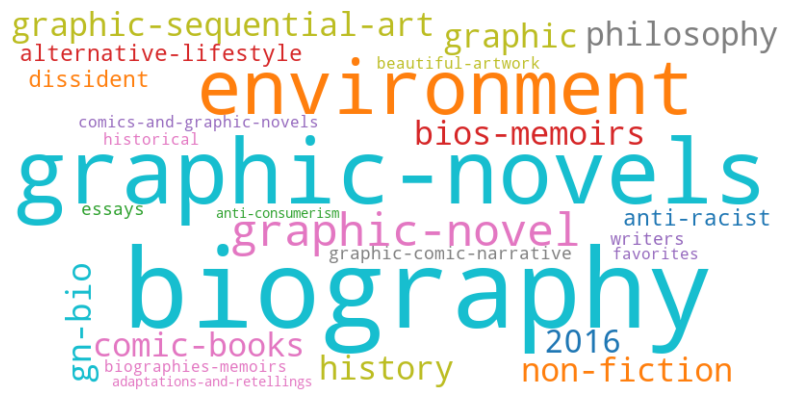

In [23]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

# Generate the wordcloud
wordcloud = WordCloud(width=800, height=400, background_color="rgba(255,255,255,0)", colormap="tab10").generate_from_frequencies(frequency)

# Plot the wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Analyses Demo

On Julie's data AllReviews_Additional_30_Unique.csv

In [25]:
path = "../Data/Web-Scraped_Data/AllReviews_Additional_30_Unique.csv"
df = pd.read_csv(path)
df.head()

,Title,Review_Author,Account_Type,Author_Social_Stats,Social_Stats,Review_Date,Review_Star_Rating,Review_Text,Review_Tag_1,Review_Tag_2,Review_Tag_3,Review_Likes,Title_Rating,Title_Rating_Distribution
0,The Night Witches,Chad,"8,589 reviews",NaN,960 followers,"March 12, 2019","<span aria-label=""Rating 5 out of 5"" role=""img...",Collects the three Night Witch stories from Ba...,2019,edelweiss,NaN,35 likes,3.70\n355 ratings85 reviews,5 stars\n76 (21%)\n4 stars\n135 (38%)\n3 stars...
1,The Night Witches,Heidi The Reader,"1,395 reviews",NaN,"1,525 followers","May 22, 2019","<span aria-label=""Rating 4 out of 5"" role=""img...",Though the main characters in The Night Witche...,graphic-art-or-comic,reviewed-by-request,NaN,30 likes,3.70\n355 ratings85 reviews,5 stars\n76 (21%)\n4 stars\n135 (38%)\n3 stars...
2,The Night Witches,Alexander Peterhans,Author,234 followers,2 books,"April 6, 2020","<span aria-label=""Rating 4 out of 5"" role=""img...",The Night Witches (Nacht Hexen) is what German...,netgalley,NaN,NaN,13 likes,3.70\n355 ratings85 reviews,5 stars\n76 (21%)\n4 stars\n135 (38%)\n3 stars...
3,The Night Witches,Geoff,986 reviews,NaN,111 followers,"August 14, 2020","<span aria-label=""Rating 4 out of 5"" role=""img...",If the Western Front in WWII is the story of d...,arc,comics,net-galley,9 likes,3.70\n355 ratings85 reviews,5 stars\n76 (21%)\n4 stars\n135 (38%)\n3 stars...
4,The Night Witches,Madara,316 reviews,NaN,54 followers,"May 18, 2020","<span aria-label=""Rating 4 out of 5"" role=""img...",Powerful. Lost track of time while reading The...,graphic-novels-comics,netgalley,NaN,7 likes,3.70\n355 ratings85 reviews,5 stars\n76 (21%)\n4 stars\n135 (38%)\n3 stars...


## Word2Vec

In [39]:
# prepare the data for word2vec

texts = df['Review_Text'].tolist()
texts = [text.replace("graphic biography", "graphic_biography") for text in texts]
texts = [word_tokenize(text) for text in texts]

In [41]:
# word2vec model

model = Word2Vec(texts, vector_size=100, window=5, min_count=1, workers=4)
model.wv.most_similar('graphic_biography')

[('piece', 0.9609476923942566),
 ('comic', 0.9482964277267456),
 ('decent', 0.9233219027519226),
 ('biography', 0.9182131886482239),
 ('wonderful', 0.910349428653717),
 ('bio', 0.9098421335220337),
 ('summary', 0.9080890417098999),
 ('beautifully', 0.906806230545044),
 ('strange', 0.9049687385559082),
 ('version', 0.9030286073684692)]

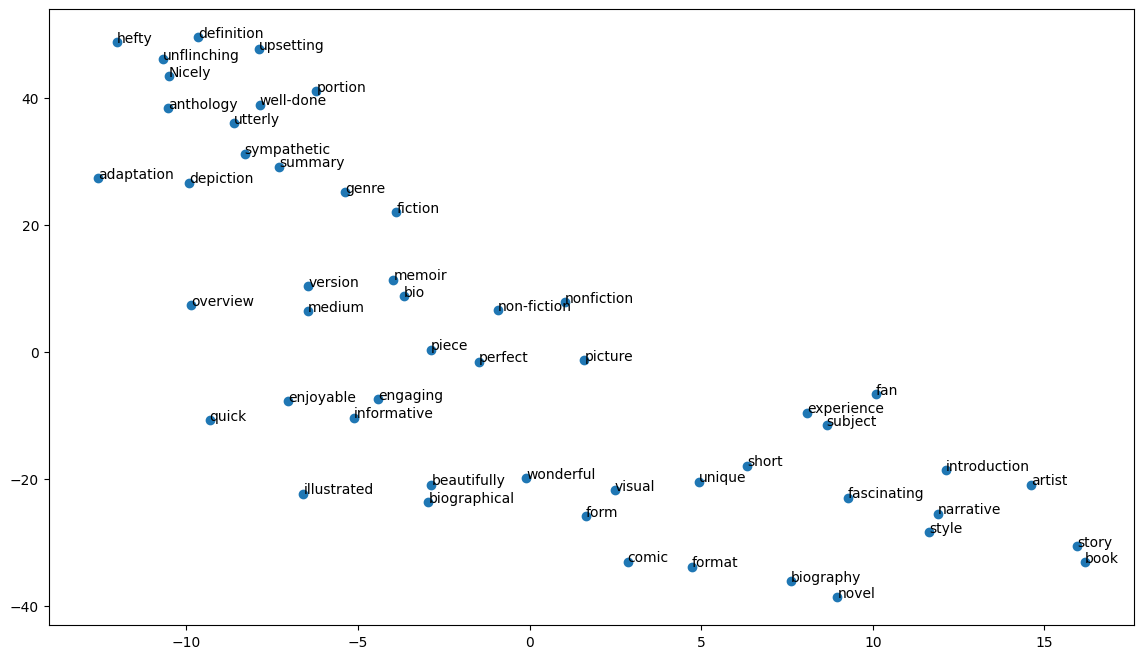

In [38]:
# t-SNE

# 获取模型中的词汇表和对应的词向量
similar_words = [word for word, _ in model.wv.most_similar('biography', topn=50)]
similar_words.append('biography')
word_vectors = model.wv[similar_words]

# 使用 t-SNE 降维
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
word_vectors_2d = tsne.fit_transform(word_vectors)

# 绘制降维后的词向量
plt.figure(figsize=(14, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])

# 标注每个词的位置
for i, word in enumerate(similar_words):
    plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

plt.show()

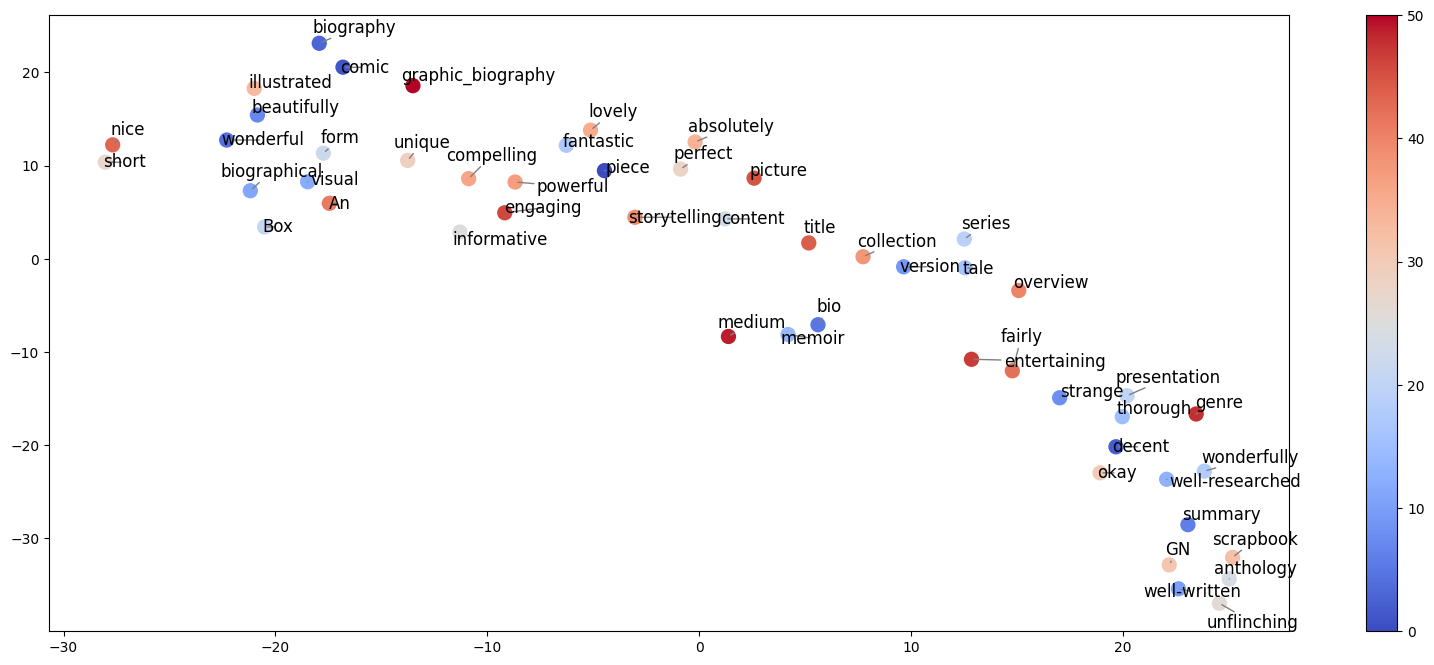

In [51]:
# t-SNE

# 获取模型中的词汇表和对应的词向量
similar_words = [word for word, _ in model.wv.most_similar('graphic_biography', topn=50)]
similar_words.append('graphic_biography')
word_vectors = model.wv[similar_words]

# 使用 t-SNE 降维
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
word_vectors_2d = tsne.fit_transform(word_vectors)

# 绘制降维后的词向量
plt.figure(figsize=(20, 8))

# 生成颜色映射的数值，使用 range(len(similar_words)) 作为数值映射
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], c=range(len(similar_words)), cmap="coolwarm", s=100)

# 标注每个词的位置
texts = []
for i, word in enumerate(similar_words):
    texts.append(plt.text(word_vectors_2d[i, 0], word_vectors_2d[i, 1], word, fontsize=12, color='black'))

# 自动调整标签的位置，避免重叠
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray'))

# 添加颜色条
plt.colorbar()

plt.show()

## LDA

In [73]:
review_df = df[['Title', 'Review_Text']]
review_df.head()

,Title,Review_Text
0,The Night Witches,Collects the three Night Witch stories from Ba...
1,The Night Witches,Though the main characters in The Night Witche...
2,The Night Witches,The Night Witches (Nacht Hexen) is what German...
3,The Night Witches,If the Western Front in WWII is the story of d...
4,The Night Witches,Powerful. Lost track of time while reading The...


In [68]:
# English reviews only

def is_english(text):
    try:
        return detect(text) == 'en'
    except LangDetectException:
        return False

In [75]:
review_df.loc[:,'lang'] = review_df['Review_Text'].apply(is_english)
review_df = review_df[review_df['lang'] == True].copy()
review_df.drop(columns=['lang'], inplace=True)

In [76]:
review_df.insert(0, 'Index', review_df.index.map(lambda x: f"{x+1:03d}"))
review_df.head()

,Index,Title,Review_Text
0,001,The Night Witches,Collects the three Night Witch stories from Ba...
1,002,The Night Witches,Though the main characters in The Night Witche...
2,003,The Night Witches,The Night Witches (Nacht Hexen) is what German...
3,004,The Night Witches,If the Western Front in WWII is the story of d...
4,005,The Night Witches,Powerful. Lost track of time while reading The...


In [77]:
review_df.loc[:, 'Review_Text'] = review_df['Review_Text'].apply(lambda x: x.replace("\n", " "))
review_df.loc[:, 'Review_Text'] = review_df['Review_Text'].apply(lambda x: x.replace("\t", " "))
review_df.loc[:, 'Title'] = review_df['Title'].apply(lambda x: x.replace(" ", "_"))

In [78]:
poster_LDA_path  = "../Data/poster240925_LDA.txt"
review_df.to_csv(poster_LDA_path, sep='\t', header=False, index=False)

In [83]:
title_counts = df['Title'].value_counts()
print(title_counts)

Title
Andre the Giant: Life and Legend                                                                       510
Radioactive: Marie and Pierre Curie, A Tale of Love and Fallout                                        509
Red Rosa: A Graphic Biography of Rosa Luxemburg                                                        478
Kusama: The Graphic Novel                                                                              374
The Imitation Game                                                                                     325
Annie Sullivan and the Trials of Helen Keller                                                          300
Oak Flat: A Fight for Sacred Land in the American West                                                 285
Steve Jobs: Insanely Great                                                                             258
Satchel Paige: Striking Out Jim Crow                                                                   194
21: The Story Of Roberto Clemen

- Run the document on jsLDA: 100 iterations, 10 topics, no stop words
- Findings
  - jsLDA performance influence factors:
    - iteration numbers
    - topic numbers
    - if 25 topics, topics will be specified on books, which normally have more reviews than other books (i.e., Red Rosa)

## ABSA

https://colab.research.google.com/drive/1xImVvfB6RsuD-9WXdKApqdnjUjPN9MUC?usp=drive_link